# Question 8
### Use logistic regression to build a model to classify the breast cancer dataset Divide the dataset into training and testing in the ratio 70:30 . Print the confusion matrix, sensitivity, specificity. For each iteration of training, store the training and testing accuracy. Plot a graph showing training and testing accuracy Vs iteration no. Do not use sklearn logistic function.

## Import necessary libraries

In [25]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

## Building the regression model

In [ ]:
class LogisticRegression:
    
#     def sigmoidFunction(self,z):
#         return 1/(1-np.exp(z))
    def sigmoidFunction(self,z):
        sig = 1 / (1 + np.exp(-z))     # Define sigmoid function
        sig = np.minimum(sig, 0.9999)  # Set upper bound
        sig = np.maximum(sig, 0.0001)  # Set lower bound
        return sig
    
    def costFunction(self,X,Y,theta,c):
        m = len(X)
        n = len(X[0])
        fx = np.matmul(X,theta)
        
        pred_1 = Y*np.log(self.sigmoidFunction(fx+c))
        pred_0 = (1-Y)*np.log(1-self.sigmoidFunction(fx+c))
        loss = -sum(pred_1 + pred_0)/m
        return loss
    
    def fit(self,X,Y,lr,epochs):
        
        n = len(X[0])
        m = len(X)
        theta = np.random.rand(X.shape[1])
        c = 0
        loss = []
        accuracy = []
        
        for _ in range(epochs):
            fx = np.matmul(X,theta)
            Y_hat = self.sigmoidFunction(fx+c)
            Y_xoxx = Y_hat - Y
            theta -= lr*np.dot(X.T,Y_xoxx)/m
            c -= (lr*sum(Y_xoxx))/m
            loss.append(self.costFunction(X, Y, theta,c))
        
        self.theta = theta
        self.intercept = c
        self.loss = loss
        
        plt.plot(np.arange(0,epochs,1),self.loss)
        plt.show()
        
    def predict(self, X):        
        fx = np.matmul(X, self.theta)
        return [1 if i > 0.5 else 0 for i in self.sigmoidFunction(fx+self.intercept)]

    def confusionMatrix(self,X_test,Y_test):
        Y_pred = self.predict(X_test)
        confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
        cm_display.plot()
        plt.show()

## Testing the model on breast cancer dataset

C:\Users\kumar\AppData\Local\Temp\ipykernel_8376\3836917403.py:10: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-z))     # Define sigmoid function


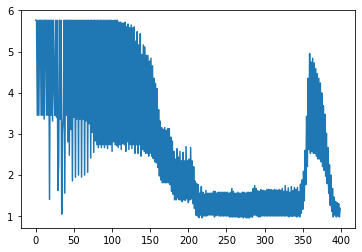

C:\Users\kumar\AppData\Local\Temp\ipykernel_8376\3836917403.py:10: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-z))     # Define sigmoid function


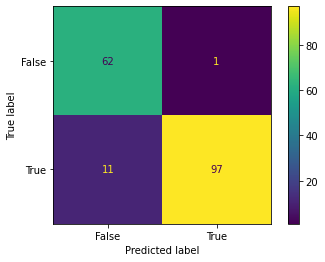

In [26]:
cancer = datasets.load_breast_cancer()

X = cancer.data
Y = cancer.target

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

lr = LogisticRegression()
lr.fit(X_train,Y_train,0.05,400)
xo = lr.predict(X_test)
lr.confusionMatrix(X_test,Y_test)




